In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-982.5344)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 677.04364  validloss 1447.06972±0.00000  bestvalidloss 1447.06972  last_update 0
train: iter 1  trainloss 275.00991  validloss 611.47583±0.00000  bestvalidloss 611.47583  last_update 0
train: iter 2  trainloss 230.53609  validloss 319.63634±0.00000  bestvalidloss 319.63634  last_update 0
train: iter 3  trainloss 189.48451  validloss 382.02607±0.00000  bestvalidloss 319.63634  last_update 1
train: iter 4  trainloss -24.66916  validloss 779.00643±0.00000  bestvalidloss 319.63634  last_update 2
train: iter 5  trainloss -215.59346  validloss 213.92780±0.00000  bestvalidloss 213.92780  last_update 0
train: iter 6  trainloss -138.66976  validloss -102.31381±0.00000  bestvalidloss -102.31381  last_update 0
train: iter 7  trainloss -351.18372  validloss 148.99628±0.00000  bestvalidloss -102.31381  last_update 1
train: iter 8  trainloss -436.71993  validloss -168.79200±0.00000  bestvalidloss -168.79200  last_update 0
train: iter 9  trainloss -513.4267

train: iter 75  trainloss -1607.98417  validloss -1508.33909±0.00000  bestvalidloss -1509.43587  last_update 2
train: iter 76  trainloss -1612.54191  validloss -1521.76674±0.00000  bestvalidloss -1521.76674  last_update 0
train: iter 77  trainloss -1665.83600  validloss -1526.54995±0.00000  bestvalidloss -1526.54995  last_update 0
train: iter 78  trainloss -1485.51722  validloss -1476.76448±0.00000  bestvalidloss -1526.54995  last_update 1
train: iter 79  trainloss -1692.38349  validloss -1415.80595±0.00000  bestvalidloss -1526.54995  last_update 2
train: iter 80  trainloss -1683.73759  validloss -1570.79718±0.00000  bestvalidloss -1570.79718  last_update 0
train: iter 81  trainloss -1705.82208  validloss -1582.18178±0.00000  bestvalidloss -1582.18178  last_update 0
train: iter 82  trainloss -1662.18519  validloss -1541.12486±0.00000  bestvalidloss -1582.18178  last_update 1
train: iter 83  trainloss -1713.27349  validloss -1587.67801±0.00000  bestvalidloss -1587.67801  last_update 0
t

train: iter 149  trainloss -1796.82203  validloss -1675.07465±0.00000  bestvalidloss -1728.29920  last_update 7
train: iter 150  trainloss -1868.24734  validloss -1657.36304±0.00000  bestvalidloss -1728.29920  last_update 8
train: iter 151  trainloss -1872.75004  validloss -1696.09545±0.00000  bestvalidloss -1728.29920  last_update 9
train: iter 152  trainloss -1861.18594  validloss -1729.63794±0.00000  bestvalidloss -1729.63794  last_update 0
train: iter 153  trainloss -1849.89587  validloss -1735.84848±0.00000  bestvalidloss -1735.84848  last_update 0
train: iter 154  trainloss -1777.11701  validloss -1683.28731±0.00000  bestvalidloss -1735.84848  last_update 1
train: iter 155  trainloss -1736.50468  validloss -1045.31522±0.00000  bestvalidloss -1735.84848  last_update 2
train: iter 156  trainloss -1834.38413  validloss -1675.32987±0.00000  bestvalidloss -1735.84848  last_update 3
train: iter 157  trainloss -1866.02990  validloss -1685.31329±0.00000  bestvalidloss -1735.84848  last_u

train: iter 223  trainloss -1877.38618  validloss -1740.99157±0.00000  bestvalidloss -1776.12962  last_update 11
train: iter 224  trainloss -1847.50880  validloss -1769.39780±0.00000  bestvalidloss -1776.12962  last_update 12
train: iter 225  trainloss -1904.98547  validloss -1757.98750±0.00000  bestvalidloss -1776.12962  last_update 13
train: iter 226  trainloss -1774.39503  validloss -1773.51976±0.00000  bestvalidloss -1776.12962  last_update 14
train: iter 227  trainloss -1845.20996  validloss -1337.31783±0.00000  bestvalidloss -1776.12962  last_update 15
train: iter 228  trainloss -1863.35242  validloss -1757.78675±0.00000  bestvalidloss -1776.12962  last_update 16
train: iter 229  trainloss -1852.69210  validloss -1697.91856±0.00000  bestvalidloss -1776.12962  last_update 17
train: iter 230  trainloss -1898.41853  validloss -1762.24056±0.00000  bestvalidloss -1776.12962  last_update 18
train: iter 231  trainloss -1907.46113  validloss -1775.09198±0.00000  bestvalidloss -1776.12962

train: iter 296  trainloss -1911.43870  validloss -1813.41641±0.00000  bestvalidloss -1813.41641  last_update 0
train: iter 297  trainloss -1717.24353  validloss -1690.12466±0.00000  bestvalidloss -1813.41641  last_update 1
train: iter 298  trainloss -1899.12653  validloss -1722.59868±0.00000  bestvalidloss -1813.41641  last_update 2
train: iter 299  trainloss -1919.02148  validloss -1782.39592±0.00000  bestvalidloss -1813.41641  last_update 3
train: iter 300  trainloss -1920.51145  validloss -1799.34608±0.00000  bestvalidloss -1813.41641  last_update 4
train: iter 301  trainloss -1931.65940  validloss -1778.04760±0.00000  bestvalidloss -1813.41641  last_update 5
train: iter 302  trainloss -1924.28331  validloss -1793.20123±0.00000  bestvalidloss -1813.41641  last_update 6
train: iter 303  trainloss -1911.28409  validloss -1775.74150±0.00000  bestvalidloss -1813.41641  last_update 7
train: iter 304  trainloss -1870.10788  validloss -1779.22245±0.00000  bestvalidloss -1813.41641  last_u

train: iter 369  trainloss -1958.40684  validloss -1798.03915±0.00000  bestvalidloss -1832.82888  last_update 12
train: iter 370  trainloss -1841.57526  validloss -1801.24444±0.00000  bestvalidloss -1832.82888  last_update 13
train: iter 371  trainloss -1899.40341  validloss -1713.09264±0.00000  bestvalidloss -1832.82888  last_update 14
train: iter 372  trainloss -1934.60218  validloss -1796.22649±0.00000  bestvalidloss -1832.82888  last_update 15
train: iter 373  trainloss -1935.12653  validloss -1843.55375±0.00000  bestvalidloss -1843.55375  last_update 0
train: iter 374  trainloss -1943.92389  validloss -1767.46668±0.00000  bestvalidloss -1843.55375  last_update 1
train: iter 375  trainloss -1839.74577  validloss -1731.46958±0.00000  bestvalidloss -1843.55375  last_update 2
train: iter 376  trainloss -1930.32077  validloss -1702.39333±0.00000  bestvalidloss -1843.55375  last_update 3
train: iter 377  trainloss -1956.01720  validloss -1780.46672±0.00000  bestvalidloss -1843.55375  la

train: iter 443  trainloss -1956.32568  validloss -1828.92078±0.00000  bestvalidloss -1843.55375  last_update 70
train: iter 444  trainloss -1926.91187  validloss -1806.57946±0.00000  bestvalidloss -1843.55375  last_update 71
train: iter 445  trainloss -1859.51275  validloss -1668.59873±0.00000  bestvalidloss -1843.55375  last_update 72
train: iter 446  trainloss -1940.90051  validloss -1777.59062±0.00000  bestvalidloss -1843.55375  last_update 73
train: iter 447  trainloss -1955.96956  validloss -1795.88755±0.00000  bestvalidloss -1843.55375  last_update 74
train: iter 448  trainloss -1948.03351  validloss -1809.75701±0.00000  bestvalidloss -1843.55375  last_update 75
train: iter 449  trainloss -1949.62592  validloss -1806.48812±0.00000  bestvalidloss -1843.55375  last_update 76
train: iter 450  trainloss -1942.52292  validloss -1808.06403±0.00000  bestvalidloss -1843.55375  last_update 77
train: iter 451  trainloss -1965.65858  validloss -1840.15898±0.00000  bestvalidloss -1843.55375

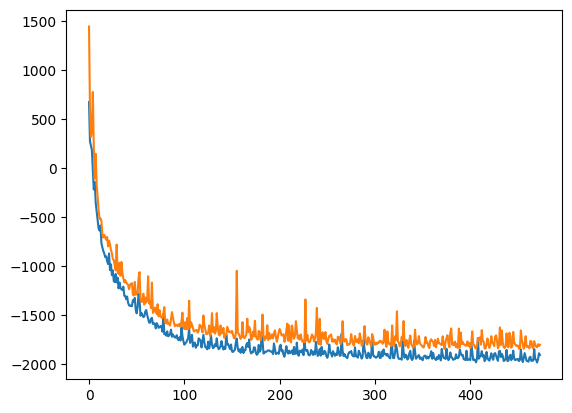

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 11.92679  validloss 12.45789±0.00000  bestvalidloss 12.45789  last_update 0
train: iter 1  trainloss 10.85442  validloss 11.30235±0.00000  bestvalidloss 11.30235  last_update 0
train: iter 2  trainloss 9.96373  validloss 10.31591±0.00000  bestvalidloss 10.31591  last_update 0
train: iter 3  trainloss 9.19820  validloss 9.51584±0.00000  bestvalidloss 9.51584  last_update 0
train: iter 4  trainloss 8.56765  validloss 8.82021±0.00000  bestvalidloss 8.82021  last_update 0
train: iter 5  trainloss 8.00600  validloss 8.21799±0.00000  bestvalidloss 8.21799  last_update 0
train: iter 6  trainloss 7.52245  validloss 7.74376±0.00000  bestvalidloss 7.74376  last_update 0
train: iter 7  trainloss 7.11374  validloss 7.28196±0.00000  bestvalidloss 7.28196  last_update 0
train: iter 8  trainloss 6.73435  validloss 6.88182±0.00000  bestvalidloss 6.88182  last_update 0
train: iter 9  trainloss 6.41466  validloss 6.54457±0.00000  bestvalidloss 6.54457  last_update 0
train: iter 

train: iter 94  trainloss -0.34921  validloss -0.15802±0.00000  bestvalidloss -0.15802  last_update 0
train: iter 95  trainloss -0.37500  validloss -0.15575±0.00000  bestvalidloss -0.15802  last_update 1
train: iter 96  trainloss -0.41801  validloss -0.21218±0.00000  bestvalidloss -0.21218  last_update 0
train: iter 97  trainloss -0.46555  validloss -0.32665±0.00000  bestvalidloss -0.32665  last_update 0
train: iter 98  trainloss -0.49763  validloss -0.30513±0.00000  bestvalidloss -0.32665  last_update 1
train: iter 99  trainloss -0.54767  validloss -0.27305±0.00000  bestvalidloss -0.32665  last_update 2
train: iter 100  trainloss -0.56954  validloss -0.34501±0.00000  bestvalidloss -0.34501  last_update 0
train: iter 101  trainloss -0.62626  validloss -0.40311±0.00000  bestvalidloss -0.40311  last_update 0
train: iter 102  trainloss -0.64638  validloss -0.47887±0.00000  bestvalidloss -0.47887  last_update 0
train: iter 103  trainloss -0.68846  validloss -0.48459±0.00000  bestvalidloss 

train: iter 189  trainloss -1.78067  validloss -1.51595±0.00000  bestvalidloss -1.66216  last_update 14
train: iter 190  trainloss -1.72159  validloss -1.56603±0.00000  bestvalidloss -1.66216  last_update 15
train: iter 191  trainloss -1.71751  validloss -1.62052±0.00000  bestvalidloss -1.66216  last_update 16
train: iter 192  trainloss -1.74704  validloss -1.55345±0.00000  bestvalidloss -1.66216  last_update 17
train: iter 193  trainloss -1.75516  validloss -1.58554±0.00000  bestvalidloss -1.66216  last_update 18
train: iter 194  trainloss -1.73352  validloss -1.63732±0.00000  bestvalidloss -1.66216  last_update 19
train: iter 195  trainloss -1.73575  validloss -1.57982±0.00000  bestvalidloss -1.66216  last_update 20
train: iter 196  trainloss -1.78210  validloss -1.52869±0.00000  bestvalidloss -1.66216  last_update 21
train: iter 197  trainloss -1.77578  validloss -1.55771±0.00000  bestvalidloss -1.66216  last_update 22
train: iter 198  trainloss -1.75322  validloss -1.60311±0.00000 

train: iter 284  trainloss -1.77424  validloss -1.65067±0.00000  bestvalidloss -1.71429  last_update 41
train: iter 285  trainloss -1.75642  validloss -1.62075±0.00000  bestvalidloss -1.71429  last_update 42
train: iter 286  trainloss -1.69966  validloss -1.47154±0.00000  bestvalidloss -1.71429  last_update 43
train: iter 287  trainloss -1.75257  validloss -1.53253±0.00000  bestvalidloss -1.71429  last_update 44
train: iter 288  trainloss -1.77497  validloss -1.57125±0.00000  bestvalidloss -1.71429  last_update 45
train: iter 289  trainloss -1.82199  validloss -1.68358±0.00000  bestvalidloss -1.71429  last_update 46
train: iter 290  trainloss -1.82356  validloss -1.67484±0.00000  bestvalidloss -1.71429  last_update 47
train: iter 291  trainloss -1.76834  validloss -1.57392±0.00000  bestvalidloss -1.71429  last_update 48
train: iter 292  trainloss -1.69518  validloss -1.63610±0.00000  bestvalidloss -1.71429  last_update 49
train: iter 293  trainloss -1.76827  validloss -1.60726±0.00000 

train: iter 363  trainloss -1.72520  validloss -1.51014±0.00000  bestvalidloss -1.73185  last_update 44
train: iter 364  trainloss -1.70067  validloss -1.53959±0.00000  bestvalidloss -1.73185  last_update 45
train: iter 365  trainloss -1.70975  validloss -1.74375±0.00000  bestvalidloss -1.74375  last_update 0
train: iter 366  trainloss -1.70345  validloss -1.53769±0.00000  bestvalidloss -1.74375  last_update 1
train: iter 367  trainloss -1.77156  validloss -1.44371±0.00000  bestvalidloss -1.74375  last_update 2
train: iter 368  trainloss -1.76231  validloss -1.52308±0.00000  bestvalidloss -1.74375  last_update 3
train: iter 369  trainloss -1.74945  validloss -1.56791±0.00000  bestvalidloss -1.74375  last_update 4
train: iter 370  trainloss -1.71906  validloss -1.56510±0.00000  bestvalidloss -1.74375  last_update 5
train: iter 371  trainloss -1.80512  validloss -1.49650±0.00000  bestvalidloss -1.74375  last_update 6
train: iter 372  trainloss -1.77402  validloss -1.65328±0.00000  bestva

train: iter 454  trainloss -1.76792  validloss -1.67855±0.00000  bestvalidloss -1.74375  last_update 89
train: iter 455  trainloss -1.83564  validloss -1.49544±0.00000  bestvalidloss -1.74375  last_update 90
train: iter 456  trainloss -1.72753  validloss -1.52691±0.00000  bestvalidloss -1.74375  last_update 91
train: iter 457  trainloss -1.73365  validloss -1.63344±0.00000  bestvalidloss -1.74375  last_update 92
train: iter 458  trainloss -1.75240  validloss -1.66368±0.00000  bestvalidloss -1.74375  last_update 93
train: iter 459  trainloss -1.76876  validloss -1.61751±0.00000  bestvalidloss -1.74375  last_update 94
train: iter 460  trainloss -1.74290  validloss -1.61159±0.00000  bestvalidloss -1.74375  last_update 95
train: iter 461  trainloss -1.74500  validloss -1.65246±0.00000  bestvalidloss -1.74375  last_update 96
train: iter 462  trainloss -1.74444  validloss -1.54743±0.00000  bestvalidloss -1.74375  last_update 97
train: iter 463  trainloss -1.72697  validloss -1.60709±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 4.1881,  1.9563, -5.0988, -4.0715], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 87.76701  validloss 89.89538±0.00000  bestvalidloss 89.89538  last_update 0
train: iter 1  trainloss 65.70480  validloss 68.10659±0.00000  bestvalidloss 68.10659  last_update 0
train: iter 2  trainloss 49.31558  validloss 50.30543±0.00000  bestvalidloss 50.30543  last_update 0
train: iter 3  trainloss 38.04820  validloss 38.01680±0.00000  bestvalidloss 38.01680  last_update 0
train: iter 4  trainloss 30.15182  validloss 29.76530±0.00000  bestvalidloss 29.76530  last_update 0
train: iter 5  trainloss 24.10346  validloss 23.55395±0.00000  bestvalidloss 23.55395  last_update 0
train: iter 6  trainloss 19.27410  validloss 18.93159±0.00000  bestvalidloss 18.93159  last_update 0
train: iter 7  trainloss 15.53422  validloss 15.42753±0.00000  bestvalidloss 15.42753  last_update 0
train: iter 8  trainloss 12.52430  validloss 12.60825±0.00000  bestvalidloss 12.60825  last_update 0
train: iter 9  trainloss 10.14679  validloss 10.52906±0.00000  bestvalidloss 10.52906  last

train: iter 84  trainloss 2.71457  validloss 4.98390±0.00000  bestvalidloss 4.87251  last_update 25
train: iter 85  trainloss 2.71121  validloss 4.96102±0.00000  bestvalidloss 4.87251  last_update 26
train: iter 86  trainloss 2.72852  validloss 4.94894±0.00000  bestvalidloss 4.87251  last_update 27
train: iter 87  trainloss 2.71405  validloss 5.02220±0.00000  bestvalidloss 4.87251  last_update 28
train: iter 88  trainloss 2.73870  validloss 5.00990±0.00000  bestvalidloss 4.87251  last_update 29
train: iter 89  trainloss 2.71625  validloss 4.94281±0.00000  bestvalidloss 4.87251  last_update 30
train: iter 90  trainloss 2.70439  validloss 4.92209±0.00000  bestvalidloss 4.87251  last_update 31
train: iter 91  trainloss 2.68419  validloss 4.88276±0.00000  bestvalidloss 4.87251  last_update 32
train: iter 92  trainloss 2.70489  validloss 4.87449±0.00000  bestvalidloss 4.87251  last_update 33
train: iter 93  trainloss 2.68994  validloss 5.00288±0.00000  bestvalidloss 4.87251  last_update 34


train: iter 168  trainloss 2.24673  validloss 3.95154±0.00000  bestvalidloss 3.93926  last_update 4
train: iter 169  trainloss 2.24578  validloss 4.11231±0.00000  bestvalidloss 3.93926  last_update 5
train: iter 170  trainloss 2.24122  validloss 3.94939±0.00000  bestvalidloss 3.93926  last_update 6
train: iter 171  trainloss 2.22758  validloss 4.07338±0.00000  bestvalidloss 3.93926  last_update 7
train: iter 172  trainloss 2.24692  validloss 3.91167±0.00000  bestvalidloss 3.91167  last_update 0
train: iter 173  trainloss 2.22670  validloss 3.93663±0.00000  bestvalidloss 3.91167  last_update 1
train: iter 174  trainloss 2.23267  validloss 3.91853±0.00000  bestvalidloss 3.91167  last_update 2
train: iter 175  trainloss 2.23967  validloss 3.94045±0.00000  bestvalidloss 3.91167  last_update 3
train: iter 176  trainloss 2.22872  validloss 3.84445±0.00000  bestvalidloss 3.84445  last_update 0
train: iter 177  trainloss 2.19731  validloss 3.96055±0.00000  bestvalidloss 3.84445  last_update 1


train: iter 251  trainloss 2.16151  validloss 3.91990±0.00000  bestvalidloss 3.73558  last_update 23
train: iter 252  trainloss 2.17177  validloss 3.79669±0.00000  bestvalidloss 3.73558  last_update 24
train: iter 253  trainloss 2.14550  validloss 3.78707±0.00000  bestvalidloss 3.73558  last_update 25
train: iter 254  trainloss 2.15605  validloss 3.79256±0.00000  bestvalidloss 3.73558  last_update 26
train: iter 255  trainloss 2.15184  validloss 3.82599±0.00000  bestvalidloss 3.73558  last_update 27
train: iter 256  trainloss 2.17583  validloss 3.83624±0.00000  bestvalidloss 3.73558  last_update 28
train: iter 257  trainloss 2.14828  validloss 3.76063±0.00000  bestvalidloss 3.73558  last_update 29
train: iter 258  trainloss 2.16603  validloss 3.83949±0.00000  bestvalidloss 3.73558  last_update 30
train: iter 259  trainloss 2.16820  validloss 3.80498±0.00000  bestvalidloss 3.73558  last_update 31
train: iter 260  trainloss 2.14452  validloss 3.76427±0.00000  bestvalidloss 3.73558  last_

train: iter 334  trainloss 2.12841  validloss 3.74145±0.00000  bestvalidloss 3.72489  last_update 56
train: iter 335  trainloss 2.14672  validloss 3.75064±0.00000  bestvalidloss 3.72489  last_update 57
train: iter 336  trainloss 2.13354  validloss 3.72639±0.00000  bestvalidloss 3.72489  last_update 58
train: iter 337  trainloss 2.13510  validloss 3.75851±0.00000  bestvalidloss 3.72489  last_update 59
train: iter 338  trainloss 2.15098  validloss 3.76201±0.00000  bestvalidloss 3.72489  last_update 60
train: iter 339  trainloss 2.13517  validloss 3.81662±0.00000  bestvalidloss 3.72489  last_update 61
train: iter 340  trainloss 2.17247  validloss 3.77257±0.00000  bestvalidloss 3.72489  last_update 62
train: iter 341  trainloss 2.16151  validloss 3.87303±0.00000  bestvalidloss 3.72489  last_update 63
train: iter 342  trainloss 2.17690  validloss 3.84278±0.00000  bestvalidloss 3.72489  last_update 64
train: iter 343  trainloss 2.14568  validloss 3.73642±0.00000  bestvalidloss 3.72489  last_

train: iter 418  trainloss 2.14959  validloss 3.74987±0.00000  bestvalidloss 3.69316  last_update 27
train: iter 419  trainloss 2.12179  validloss 3.83728±0.00000  bestvalidloss 3.69316  last_update 28
train: iter 420  trainloss 2.09649  validloss 3.80313±0.00000  bestvalidloss 3.69316  last_update 29
train: iter 421  trainloss 2.11203  validloss 3.79198±0.00000  bestvalidloss 3.69316  last_update 30
train: iter 422  trainloss 2.12955  validloss 3.84016±0.00000  bestvalidloss 3.69316  last_update 31
train: iter 423  trainloss 2.12629  validloss 3.78614±0.00000  bestvalidloss 3.69316  last_update 32
train: iter 424  trainloss 2.15193  validloss 3.77847±0.00000  bestvalidloss 3.69316  last_update 33
train: iter 425  trainloss 2.16987  validloss 3.78461±0.00000  bestvalidloss 3.69316  last_update 34
train: iter 426  trainloss 2.13665  validloss 3.75788±0.00000  bestvalidloss 3.69316  last_update 35
train: iter 427  trainloss 2.10706  validloss 3.82560±0.00000  bestvalidloss 3.69316  last_

train: iter 501  trainloss 2.12818  validloss 3.71275±0.00000  bestvalidloss 3.65778  last_update 68
train: iter 502  trainloss 2.12978  validloss 3.71854±0.00000  bestvalidloss 3.65778  last_update 69
train: iter 503  trainloss 2.11525  validloss 3.85771±0.00000  bestvalidloss 3.65778  last_update 70
train: iter 504  trainloss 2.11038  validloss 3.72951±0.00000  bestvalidloss 3.65778  last_update 71
train: iter 505  trainloss 2.11271  validloss 3.74519±0.00000  bestvalidloss 3.65778  last_update 72
train: iter 506  trainloss 2.12504  validloss 3.75588±0.00000  bestvalidloss 3.65778  last_update 73
train: iter 507  trainloss 2.10117  validloss 3.73660±0.00000  bestvalidloss 3.65778  last_update 74
train: iter 508  trainloss 2.12465  validloss 3.77823±0.00000  bestvalidloss 3.65778  last_update 75
train: iter 509  trainloss 2.13595  validloss 3.72883±0.00000  bestvalidloss 3.65778  last_update 76
train: iter 510  trainloss 2.09073  validloss 3.64472±0.00000  bestvalidloss 3.64472  last_

train: iter 585  trainloss 2.10329  validloss 3.67724±0.00000  bestvalidloss 3.64472  last_update 75
train: iter 586  trainloss 2.11106  validloss 3.76058±0.00000  bestvalidloss 3.64472  last_update 76
train: iter 587  trainloss 2.09901  validloss 3.79984±0.00000  bestvalidloss 3.64472  last_update 77
train: iter 588  trainloss 2.08478  validloss 3.76108±0.00000  bestvalidloss 3.64472  last_update 78
train: iter 589  trainloss 2.09371  validloss 3.72864±0.00000  bestvalidloss 3.64472  last_update 79
train: iter 590  trainloss 2.11812  validloss 3.73054±0.00000  bestvalidloss 3.64472  last_update 80
train: iter 591  trainloss 2.08316  validloss 3.72692±0.00000  bestvalidloss 3.64472  last_update 81
train: iter 592  trainloss 2.12343  validloss 3.82096±0.00000  bestvalidloss 3.64472  last_update 82
train: iter 593  trainloss 2.10435  validloss 3.73498±0.00000  bestvalidloss 3.64472  last_update 83
train: iter 594  trainloss 2.09542  validloss 3.68464±0.00000  bestvalidloss 3.64472  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-3.0259)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-3.4609)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.7605639575542602
tensor([-0.2419])
